In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import requests
import time
import random
import csv
import scipy.stats as st
from scipy.stats import linregress


csv_path2021="FilteredData/Happiness2021.csv"
new_df2021=pd.read_csv(csv_path2021)
new_df2021.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
0,Albania,2021,5.255482,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.472924
1,Argentina,2021,5.908279,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.326574
2,Armenia,2021,5.300569,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.297146
3,Australia,2021,7.111599,10.818342,0.919755,71.050003,0.912402,0.237518,0.453676,0.519226
4,Austria,2021,7.079641,10.892092,0.862976,71.150002,0.794846,0.161673,0.500809,0.610459


In [2]:
csv_pathaus="FilteredData/AustraliaData.csv"
df_aus=pd.read_csv(csv_pathaus)
df_aus.head(15)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
0,Australia,2007,7.285391,10.693600,0.965276,69.959999,0.890682,0.345244,0.512578,0.526933
1,Australia,2008,7.253757,10.708705,0.946635,70.040001,0.915733,0.303524,0.430811,0.644675
2,Australia,2010,7.450047,10.712526,0.954520,70.199997,0.932059,0.314949,0.366127,0.609753
3,Australia,2011,7.405616,10.723029,0.967029,70.279999,0.944586,0.367531,0.381772,0.530787
4,Australia,2012,7.195586,10.743997,0.944599,70.360001,0.935146,0.271807,0.368252,0.420419
5,Australia,2013,7.364169,10.752455,0.928205,70.440002,0.933379,0.266937,0.431539,0.455871
6,Australia,2014,7.288550,10.762845,0.923799,70.519997,0.922932,0.316679,0.442021,0.464676
7,Australia,2015,7.309061,10.769942,0.951862,70.599998,0.921871,0.330029,0.356554,0.478557
8,Australia,2016,7.250080,10.781371,0.942334,70.675003,0.922316,0.236698,0.398545,0.452732
9,Australia,2017,7.257038,10.787225,0.949958,70.750000,0.910550,0.315514,0.411347,0.453407


In [3]:
# Top five countries with high Life Ladder scores or happiness

life_ladder_sorted = new_df2021.sort_values(['Life Ladder'], ascending = False)
life_ladder_sorted.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
25,Finland,2021,7.794378,10.794553,0.970289,71.150002,0.963190,-0.035728,0.191754,0.713731
19,Denmark,2021,7.698747,10.972980,0.944927,71.250000,0.933439,0.132816,0.172681,0.651710
40,Israel,2021,7.577528,10.616640,0.916583,72.699997,0.819777,-0.001983,0.726004,0.439595
34,Iceland,2021,7.564625,10.899748,0.979858,72.050003,0.923243,0.258855,0.664466,0.633887
85,Sweden,2021,7.439280,10.873429,0.931820,72.150002,0.953379,0.176988,0.191473,0.633536


In [5]:
# Bottom five countries with low Life Ladder scores or happiness

life_ladder_sorted = new_df2021.sort_values(['Life Ladder'], ascending = True)
life_ladder_sorted.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
50,Lebanon,2021,2.178809,9.243084,0.506775,66.150002,0.422697,-0.142942,0.905279,0.106694
98,Zambia,2021,3.082155,8.087629,0.619071,55.250000,0.832574,0.142837,0.824031,0.697678
99,Zimbabwe,2021,3.154578,8.153248,0.685151,54.049999,0.667636,-0.109439,0.756945,0.665703
35,India,2021,3.558254,8.807804,0.569733,60.900002,0.866111,0.056761,0.756820,0.785475
52,Malawi,2021,3.635283,7.316189,0.557914,58.200001,0.757269,-0.008708,0.740277,0.514003


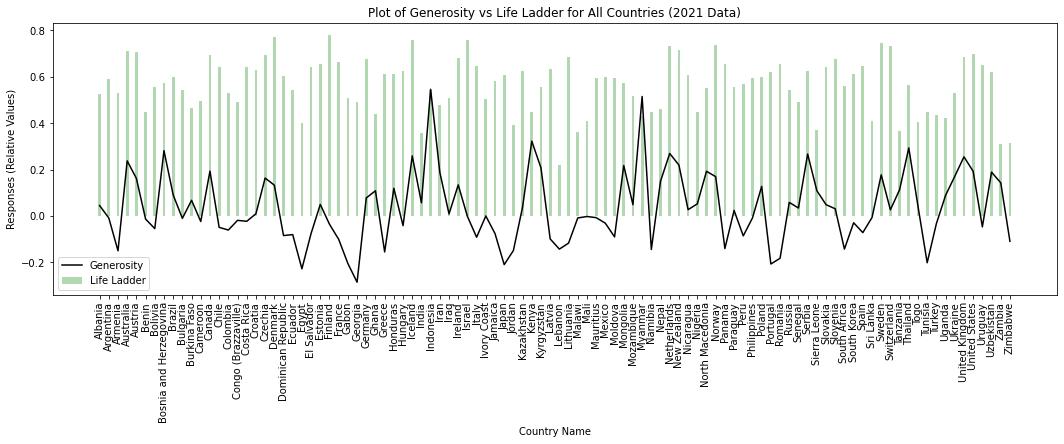

In [4]:
# Plot of Generosity vs Life Ladder for all countries

countries = list(new_df2021['Country name'])

# Set Figure Size

fig = plt.figure(figsize =(18, 5))

plt.bar(countries,new_df2021['Life Ladder']/10,color ='green', alpha=0.3, width = 0.3, label="Life Ladder")
plt.plot(countries,new_df2021['Generosity'],color='black', label="Generosity")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')

# Add labels and title

plt.xlabel("Country Name")
plt.ylabel("Responses (Relative Values)")
plt.legend(loc="lower left")
plt.title("Plot of Generosity vs Life Ladder for All Countries (2021 Data)")

# Export image
plt.savefig("Images/Fig1.png")


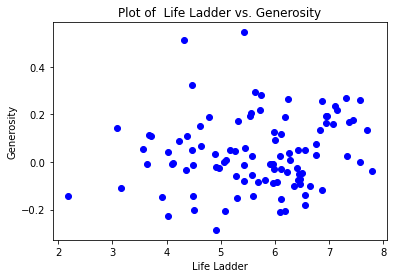

In [6]:
# Plot of Life ladder vs Generosity

x_values = new_df2021['Life Ladder']
y_values = new_df2021['Generosity']

plt.scatter(x_values,y_values, c ="blue")

plt.xlabel("Life Ladder")
plt.ylabel("Generosity")
plt.title("Plot of  Life Ladder vs. Generosity")

# Export image
plt.savefig("Images/Fig2.png")

plt.show()


The r-squared is: 0.02022148677072794


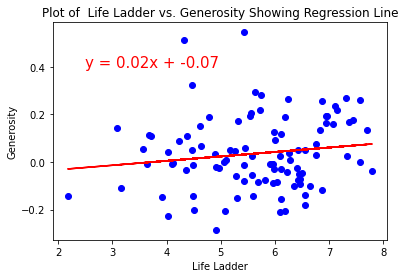

In [7]:
# Plot of Life ladder vs Generosity with Regression

x_values = new_df2021['Life Ladder']
y_values = new_df2021['Generosity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c ="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (2.5, 0.4), fontsize=15, color="red")

plt.xlabel("Life Ladder")
plt.ylabel("Generosity")
plt.title("Plot of  Life Ladder vs. Generosity Showing Regression Line")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/Fig3.png")

plt.show()


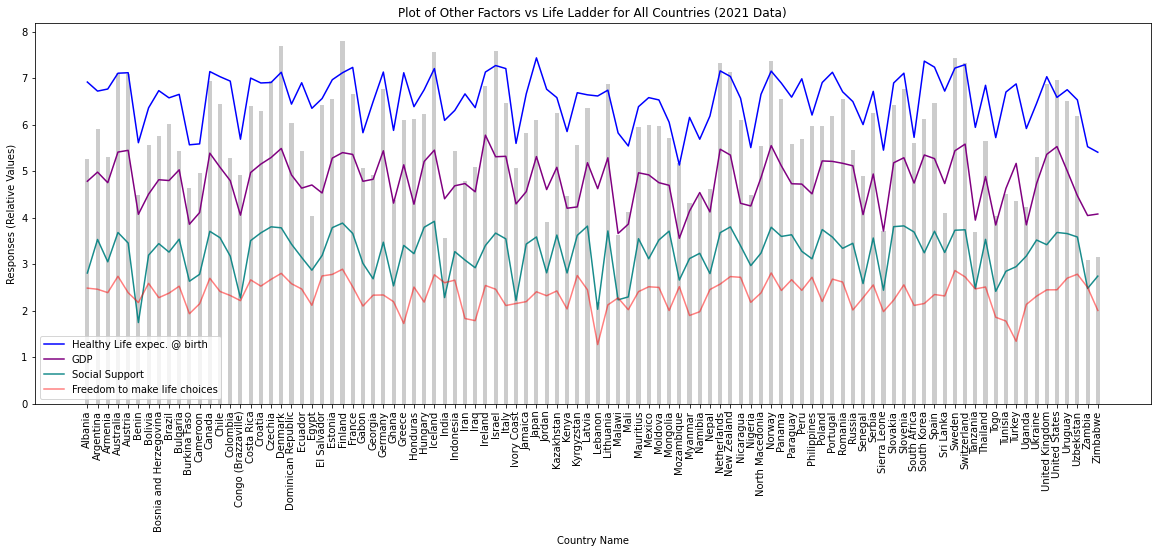

In [8]:
#  Plot of the trend of other factors vs Life Ladder for all countries

countries = list(new_df2021['Country name'])

# Set Figure Size

fig = plt.figure(figsize =(20, 7))

plt.bar(countries,new_df2021['Life Ladder'],color ='black', alpha=0.2, width = 0.4,)
plt.plot(countries,new_df2021['Healthy life expectancy at birth']/10, color='blue', label="Healthy Life expec. @ birth")
plt.plot(countries,new_df2021['Log GDP per capita']/2, color ='purple', label="GDP")
plt.plot(countries,new_df2021['Social support']*4, color ='teal', alpha=0.9, label="Social Support")
plt.plot(countries,new_df2021['Freedom to make life choices']*3, color ='red', alpha=0.5, label="Freedom to make life choices")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')

# Add labels and title

plt.xlabel("Country Name")
plt.ylabel("Responses (Relative Values)")
plt.legend(loc="lower left")

plt.title("Plot of Other Factors vs Life Ladder for All Countries (2021 Data)")

# Export image
plt.savefig("Images/Fig4.png")


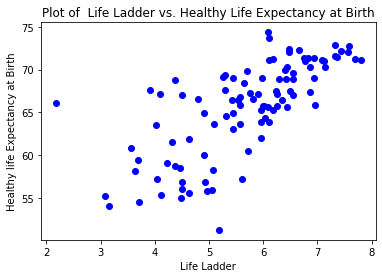

In [9]:
# Plot of Life ladder vs Healthy life Expectancy at Birth

x_values = new_df2021['Life Ladder']
y_values = new_df2021['Healthy life expectancy at birth']

plt.scatter(x_values,y_values, c ="blue")

plt.xlabel("Life Ladder")
plt.ylabel("Healthy life Expectancy at Birth")
plt.title("Plot of  Life Ladder vs. Healthy Life Expectancy at Birth")

plt.show()

The r-squared is: 0.511427712453858


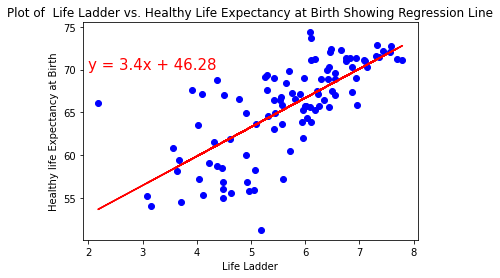

In [10]:
# Plot of Life ladder vs Healthy life Expectancy at Birth with Regression

x_values = new_df2021['Life Ladder']
y_values = new_df2021['Healthy life expectancy at birth']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c ="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2.0, 70),fontsize=15,color="red")

plt.xlabel("Life Ladder")
plt.ylabel("Healthy life Expectancy at Birth")
plt.title("Plot of  Life Ladder vs. Healthy Life Expectancy at Birth Showing Regression Line")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/Fig5.png")

plt.show()



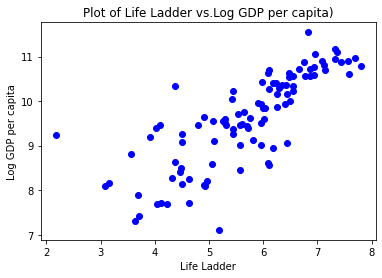

In [11]:
# Plot of Life ladder vs GDP

x_values = new_df2021['Life Ladder']
y_values = new_df2021['Log GDP per capita']

plt.scatter(x_values, y_values, c ="blue")

plt.xlabel("Life Ladder")
plt.ylabel("Log GDP per capita")
plt.title("Plot of Life Ladder vs.Log GDP per capita)")
plt.show()



The r-squared is: 0.6238750858156394


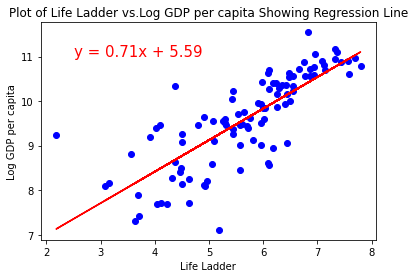

In [12]:
# Plot of Life ladder vs GDP with Regression

x_values = new_df2021['Life Ladder']
y_values = new_df2021['Log GDP per capita']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c ="blue")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (2.5, 11.0), fontsize=15, color="red")

plt.xlabel("Life Ladder")
plt.ylabel("Log GDP per capita")
plt.title("Plot of Life Ladder vs.Log GDP per capita Showing Regression Line")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Fig6.png")
plt.show()


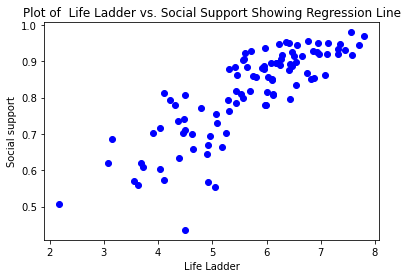

In [13]:
#  Plot of Life ladder vs Social Support

x_values = new_df2021['Life Ladder']
y_values = new_df2021['Social support']

plt.scatter(x_values,y_values, c ="blue")

plt.xlabel("Life Ladder")
plt.ylabel("Social support")
plt.title("Plot of  Life Ladder vs. Social Support Showing Regression Line")

plt.show()

The r-squared is: 0.6873814743223681


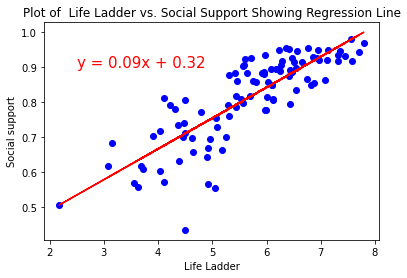

In [14]:
#  Plot of Life ladder vs Social Support with Regression

x_values = new_df2021['Life Ladder']
y_values = new_df2021['Social support']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c ="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (2.5, 0.9), fontsize=15, color="red")

plt.xlabel("Life Ladder")
plt.ylabel("Social support")
plt.title("Plot of  Life Ladder vs. Social Support Showing Regression Line")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/Fig7.png")

plt.show()

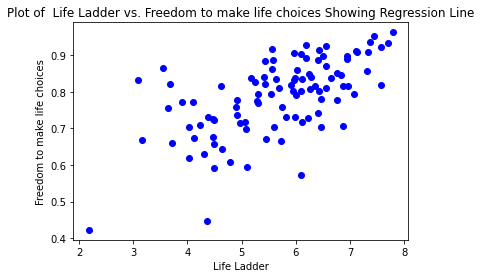

In [15]:
#  Plot of Life ladder vs Freedom to make life choices with Regression

x_values = new_df2021['Life Ladder']
y_values = new_df2021['Freedom to make life choices']


plt.scatter(x_values,y_values, c ="blue")

plt.xlabel("Life Ladder")
plt.ylabel("Freedom to make life choices")
plt.title("Plot of  Life Ladder vs. Freedom to make life choices Showing Regression Line")

plt.show()

The r-squared is: 0.3860922001465681


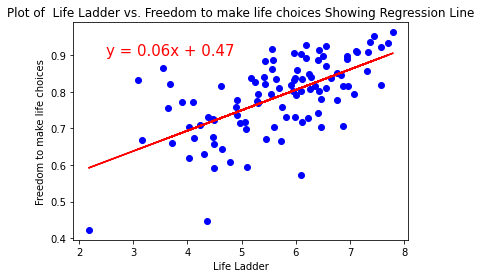

In [16]:
#  Plot of Life ladder vs Freedom to make life choices with Regression

x_values = new_df2021['Life Ladder']
y_values = new_df2021['Freedom to make life choices']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c ="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (2.5, 0.9), fontsize=15, color="red")

plt.xlabel("Life Ladder")
plt.ylabel("Freedom to make life choices")
plt.title("Plot of  Life Ladder vs. Freedom to make life choices Showing Regression Line")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/Fig8.png")

plt.show()

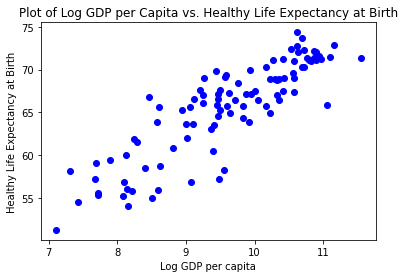

In [17]:
# Plot of GDP vs Healthy Life Expectancy at Birth

x_values = new_df2021['Log GDP per capita']
y_values = new_df2021['Healthy life expectancy at birth']

plt.scatter(x_values,y_values, c ="blue")

plt.xlabel("Log GDP per capita")
plt.ylabel("Healthy Life Expectancy at Birth")
plt.title("Plot of Log GDP per Capita vs. Healthy Life Expectancy at Birth")

plt.show()


The r-squared is: 0.7525134255636778


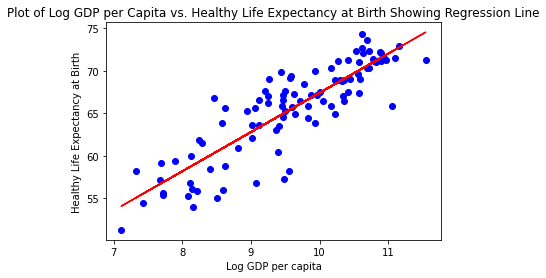

In [18]:
# Plot of Life ladder vs Healthy Life Expectancy at Birth with Regression

x_values = new_df2021['Log GDP per capita']
y_values = new_df2021['Healthy life expectancy at birth']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c ="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (2.5, 0.4), fontsize=15, color="red")

plt.xlabel("Log GDP per capita")
plt.ylabel("Healthy Life Expectancy at Birth")
plt.title("Plot of Log GDP per Capita vs. Healthy Life Expectancy at Birth Showing Regression Line")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/Fig9.png")

plt.show()


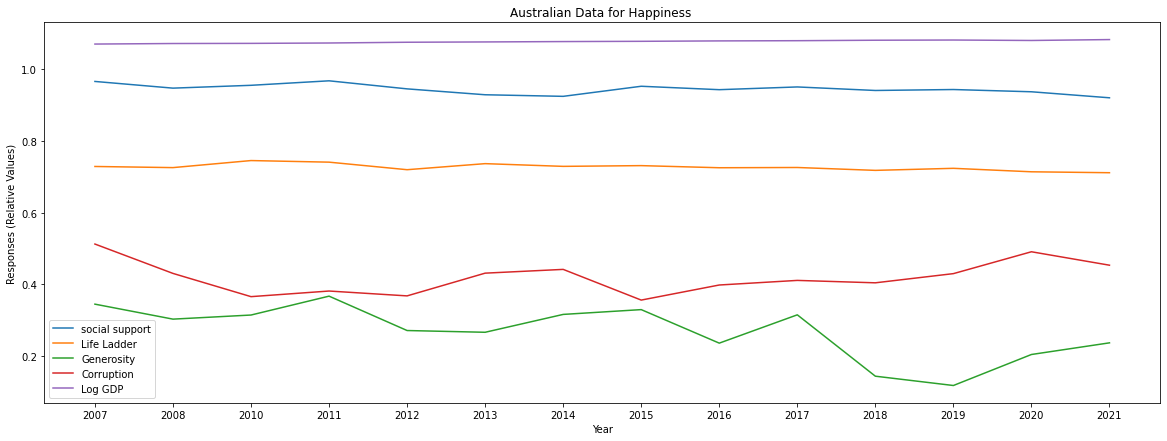

In [19]:
# Creating a subset of Data for Australia for the years it has participated in the Happiness survey
years_aus = df_aus['year'].astype(str)
lifeladder_aus=df_aus['Life Ladder']
socialsupport_aus=df_aus['Social support']
generosity_aus=df_aus['Generosity']
corruption_aus=df_aus['Perceptions of corruption']
gdp_aus=df_aus['Log GDP per capita']

fig = plt.figure(figsize =(20, 7))

plt.title("Australian Data for Happiness ")
plt.xlabel("Year")
plt.ylabel("Responses (Relative Values)")
plt.plot (years_aus,socialsupport_aus)
plt.plot(years_aus,lifeladder_aus/10)
plt.plot (years_aus,generosity_aus)
plt.plot (years_aus,corruption_aus)
plt.plot (years_aus,gdp_aus/10)
plt.legend(["social support","Life Ladder ",
          "Generosity","Corruption" ,"Log GDP"], loc ="best")
plt.xticks(rotation='horizontal')
plt.yticks(rotation='horizontal')
df_aus

# Export image
plt.savefig("Images/Fig10.png")


In [20]:
# Trends to analyse during the pandemic

pandemic=[2018,2019,2020,2021]
df_auspandemic=pd.DataFrame(df_aus[df_aus['year'].isin(pandemic)])
df_auspandemic

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
10,Australia,2018,7.176993,10.800169,0.940137,70.824997,0.916028,0.144676,0.404647,0.468837
11,Australia,2019,7.233995,10.805864,0.942774,70.900002,0.917537,0.118749,0.430209,0.468700
12,Australia,2020,7.137368,10.793239,0.936517,70.974998,0.905283,0.205083,0.491095,0.446422
13,Australia,2021,7.111599,10.818342,0.919755,71.050003,0.912402,0.237518,0.453676,0.519226


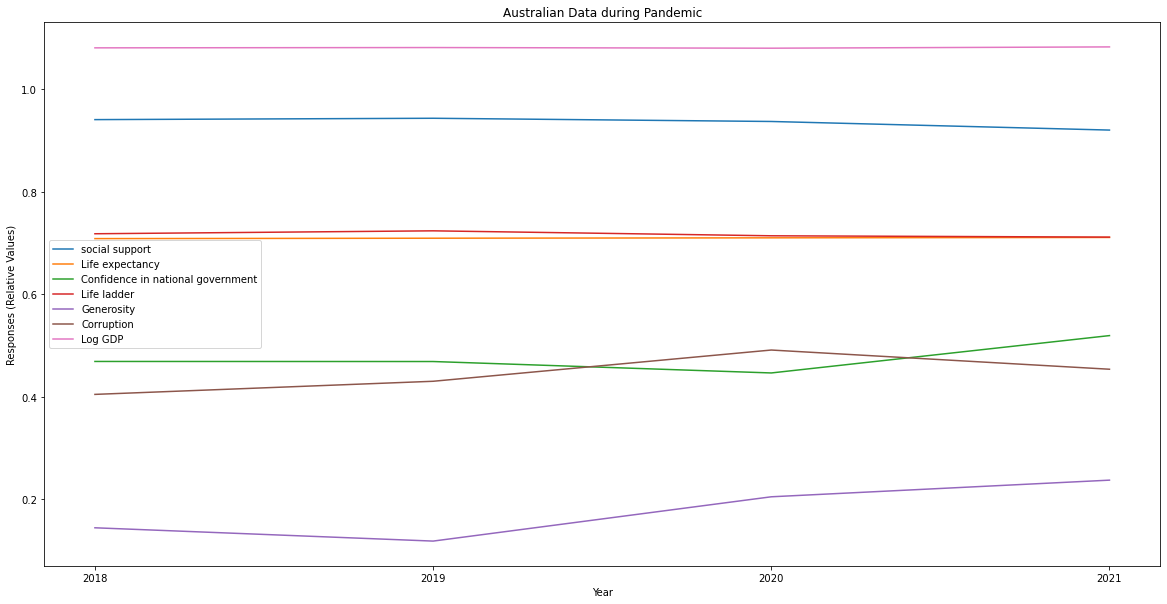

In [21]:
# Did Pandemic changed any trends in Happiness data for Australia?
years_auspandemic = df_auspandemic['year'].astype(str)
lifeexpectancy_aus=df_auspandemic['Healthy life expectancy at birth']
lifeladder_auspandemic=df_auspandemic['Life Ladder']
socialsupport_auspandemic=df_auspandemic['Social support']
generosity_auspandemic=df_auspandemic['Generosity']
corruption_auspandemic=df_auspandemic['Perceptions of corruption']
gdp_auspandemic=df_auspandemic['Log GDP per capita']
confidence_ausgov=df_auspandemic['Confidence in national government']
fig = plt.figure(figsize =(20,10))
plt.title("Australian Data during Pandemic")
plt.xlabel("Year")
plt.ylabel("Responses (Relative Values)")
plt.plot (years_auspandemic ,socialsupport_auspandemic)
plt.plot (years_auspandemic ,lifeexpectancy_aus/100)
plt.plot (years_auspandemic ,confidence_ausgov)
plt.plot(years_auspandemic ,lifeladder_auspandemic/10)
plt.plot (years_auspandemic ,generosity_auspandemic)
plt.plot (years_auspandemic ,corruption_auspandemic)
plt.plot (years_auspandemic ,gdp_auspandemic/10)
plt.legend(["social support","Life expectancy ","Confidence in national government",
          "Life ladder","Generosity","Corruption" ,"Log GDP"], loc ="best")

# Export image

plt.savefig("Images/Fig11.png")

plt.show()

